<h1><b>House M.D. - Linear Regression Training</b></h1>
By Alexander L. Myfia, Alrismany Abigail S., Viriya Savoeun

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functools import reduce
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
terms = ["House", "anemia", "arrhythmia", "asthma", 
        "bacteria", "biopsy", "cancer", "cardiomyopathy", 
        "cholesterol", "coma", "diabetes", "embolism", 
        "encephalitis",  "epilepsy", "hypertension", "immunodeficiency", 
        "infection", "leukemia", "lupus", "malaria", 
        "pneumonia", "sepsis", "stroke", "tumor"]

df_set = [pd.read_csv(f"keywords/{t}.csv", delimiter=',', on_bad_lines='skip') for t in terms]

In [10]:
for i in range(len(df_set)):
    df_set[i].reset_index(inplace = True)
    df_set[i].rename(columns={'index' : 'Date'},inplace=True)
    df_set[i].rename(columns={'Category: All categories':f'{terms[i]}'},inplace=True)
    df_set[i].fillna(0, inplace=True)
    df_set[i].drop(index=[0], inplace=True)

In [11]:
NewDF = reduce(lambda left, right: left.merge(right, on='Date'), df_set)
NewDF.head()

columns = terms.copy()
NewDF[columns] = NewDF[columns].apply(pd.to_numeric,  errors='coerce')

med_terms = terms.copy()
med_terms.remove('House')
NewDF['Average'] = NewDF[med_terms].mean(axis=1)

NewDF.head()

,Date,House,anemia,arrhythmia,asthma,bacteria,biopsy,cancer,cardiomyopathy,cholesterol,...,immunodeficiency,infection,leukemia,lupus,malaria,pneumonia,sepsis,stroke,tumor,Average
0,2004-11,4,61,52,56,59,55,95,53,68,...,8,48,90,43,24,20,32,50,30,47.826087
1,2004-12,6,55,50,46,45,49,82,47,60,...,8,47,88,41,27,20,26,45,26,43.086957
2,2005-01,6,58,55,55,50,55,86,50,70,...,8,49,82,43,32,24,29,43,28,45.739130
3,2005-02,7,67,60,50,59,53,90,62,72,...,11,50,89,47,30,25,33,51,31,49.652174
4,2005-03,11,63,53,52,49,54,82,60,73,...,9,49,89,45,30,23,31,44,31,47.826087


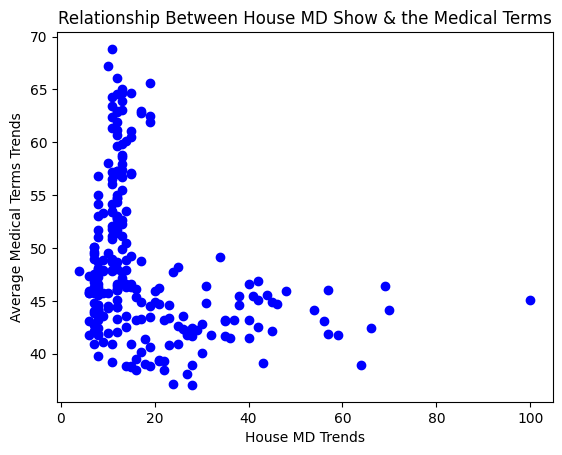

Correlation (r) = -0.29778526902491526


In [12]:
plt.scatter(NewDF['House'],NewDF['Average'],color='blue')
plt.xlabel('House MD Trends')
plt.ylabel('Average Medical Terms Trends')
plt.title('Relationship Between House MD Show & the Medical Terms')

plt.show()
correlation = NewDF['House'].corr(NewDF['Average'])
print(f"Correlation (r) = {correlation}")

In [13]:
NewDF.to_csv('House_MD.csv', index=False)
dataset = pd.read_csv("House_MD.csv", delimiter=',',on_bad_lines='skip')
dataset = dataset[['House', 'Average']]
dataset.head()

,House,Average
0,4,47.826087
1,6,43.086957
2,6,45.739130
3,7,49.652174
4,11,47.826087


Proportion: 50:50
MSE: 54.093086135049646 | R^2: 0.04693890087617292


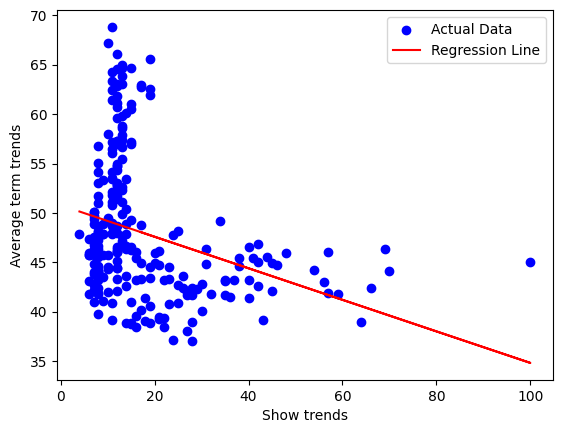

Proportion: 60:40
MSE: 57.984036903869026 | R^2: 0.055023630614038255


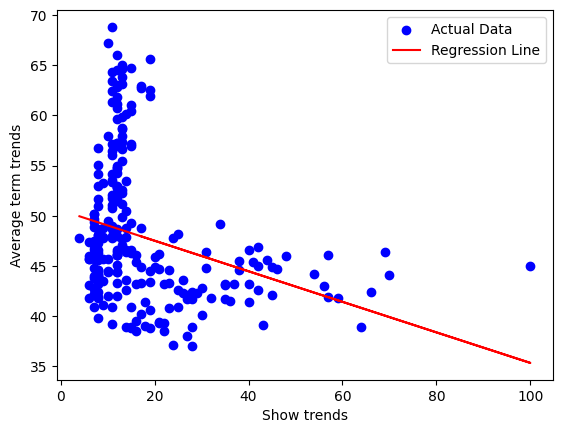

Proportion: 70:30
MSE: 50.079733299204506 | R^2: 0.06826718464696013


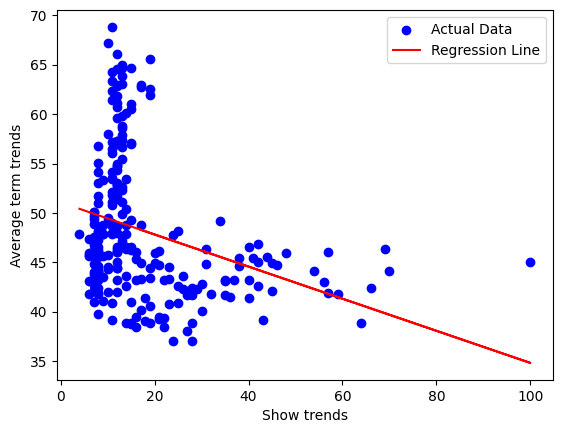

Proportion: 80:20
MSE: 59.389070459425476 | R^2: 0.0451197101025087


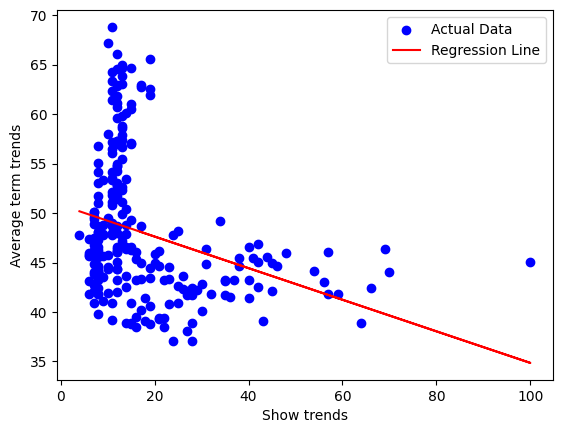

In [14]:
X, Y = dataset[['House']], dataset[['Average']]
lr_model = LinearRegression()
split_prop = [0.5, 0.4, 0.3, 0.2]

for sp in split_prop:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = sp, random_state = 2)
    lr_model.fit(x_train, y_train)
    y_pred = lr_model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    
    print(f"Proportion: {int(100 - sp*100)}:{int(sp*100)}")
    print(f"MSE: {mse} | R^2: {r2}")
    
    plt.scatter(X, Y, color = 'blue', label = 'Actual Data')
    plt.plot(X, lr_model.predict(X), color = 'red', label = 'Regression Line')
    plt.xlabel("Show trends")
    plt.ylabel("Average term trends")
    plt.legend()
    plt.show()

<hr>